# The z-Distribution <hr style="border: 2.5px solid #fa6194ff"></hr>

<b> Elyssa C. Tombale </b>
<br> T09-A </br>

In [67]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [68]:
#Load Dataset
df = pd.read_csv(r"dataset/transformer-voltage.csv",
                    delimiter=',',
                    index_col='Sample')
df

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6
6,119.6
7,119.7
8,119.7
9,119.7


In [69]:
#sumarry of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [70]:
#summary of statistics
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [71]:
# z-critical for two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(1.959963984540054)

In [72]:
#confidence interval
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence = 0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

print(f"CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

CI: [118.50, 122.08]


AttributeError: module 'matplotlib.pyplot' has no attribute 'avxline'

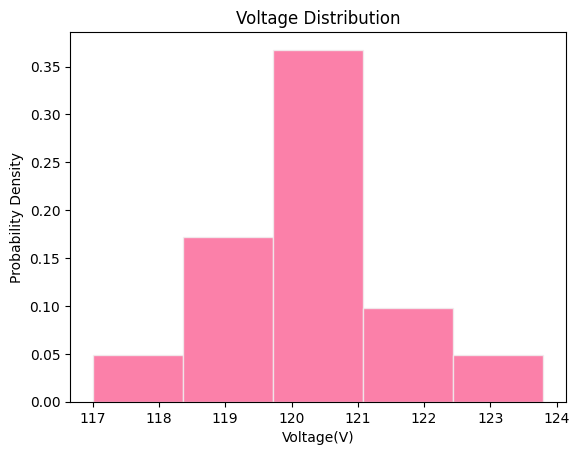

In [ ]:
#voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

#x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

#normal distribution
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)

#histogram plot
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha= 0.8,
         color= '#fa6194ff' ,
         edgecolor= "#f0f0f0ff")

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage(V)')

#confidence interval
plt.axvline(x = ci_lower,
            color="#000000ff",
            linestyle='__')
plt.axvline(x = ci_upper,
            color= "#000000ff",
            linestyle='__')
plt.show()